## Blazing Hawks
Clifford Jones\
Dongyu Liu\
Yuan Chen


**A.I. Disclaimer: Work for this assignment was completed with the aid of artificial intelligence tools.**



## **RK4 (Runge-Kutta 4th Order Method) and RK5 (Runge-Kutta 5th Order Method)**
\
#### **Runge-Kutta 4th Order Method (RK4)**

The RK4 method is a numerical technique for solving ODEs of the form:
\begin{align*}
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0.
\end{align*}

It approximates the solution y_{n+1} at t_{n+1} = t_{n} + h
 using a weighted average of intermediate slopes.

The RK4 method computes y_{n+1} as:

\begin{align*}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4),
\end{align*}

where the intermediate slopes \(k_1, k_2, k_3, k_4\) are defined as:

\begin{align*}
k_1 &= f(t_n, y_n), \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right), \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right), \\
k_4 &= f(t_n + h, y_n + h k_3).
\end{align*}



Compute k_1, the slope at the start of the interval.

Compute k_2, the slope at the midpoint using k_1.

Compute k_3, a refined midpoint slope using k_2.

Compute k_4, the slope at the end of the interval using k_3.

Combine these slopes using the formula above to estimate y_{n+1}.

#### **Classical Runge-Kutta 5th Order Method (RK5)**

This method uses six intermediate slopes k_1, k_2, ..., k_6 to compute the solution at each time step. It is more accurate than RK4, achieving fifth-order accuracy.

The next value y_{n+1} at t_{n+1} = t_{n} + h is computed as:

\begin{align*}
y_{n+1} = y_n + h \sum_{i=1}^6 b_i k_i,
\end{align*}

where \(k_i\) are the intermediate slopes, defined as:


\begin{align*}
k_1 = f(t_n, y_n),
\end{align*}

\begin{align*}
k_2 = f\left(t_n + c_2 h, y_n + a_{21} h k_1\right),
\end{align*}

\begin{align*}
k_3 = f\left(t_n + c_3 h, y_n + h \left(a_{31} k_1 + a_{32} k_2\right)\right),
\end{align*}

\begin{align*}
k_4 = f\left(t_n + c_4 h, y_n + h \left(a_{41} k_1 + a_{42} k_2 + a_{43} k_3\right)\right),
\end{align*}

\begin{align*}
k_5 = f\left(t_n + c_5 h, y_n + h \left(a_{51} k_1 + a_{52} k_2 + a_{53} k_3 + a_{54} k_4\right)\right),
\end{align*}

\begin{align*}
k_6 = f\left(t_n + c_6 h, y_n + h \left(a_{61} k_1 + a_{62} k_2 + a_{63} k_3 + a_{64} k_4 + a_{65} k_5\right)\right).
\end{align*}


And the coefficients are:

\begin{align*}
c_2 = \frac{1}{4}, \quad c_3 = \frac{3}{8}, \quad c_4 = \frac{12}{13}, \quad c_5 = 1, \quad c_6 = \frac{1}{2}.
\end{align*}

Slope Weights:
\begin{align*}
a_{21} = \frac{1}{4},
\end{align*}

\begin{align*}
a_{31} = \frac{3}{32}, \quad a_{32} = \frac{9}{32},
\end{align*}

\begin{align*}
a_{41} = \frac{1932}{2197}, \quad a_{42} = -\frac{7200}{2197}, \quad a_{43} = \frac{7296}{2197},
\end{align*}

\begin{align*}
a_{51} = \frac{439}{216}, \quad a_{52} = -8, \quad a_{53} = \frac{3680}{513}, \quad a_{54} = -\frac{845}{4104},
\end{align*}

\begin{align*}
a_{61} = -\frac{8}{27}, \quad a_{62} = 2, \quad a_{63} = -\frac{3544}{2565}, \quad a_{64} = \frac{1859}{4104}, \quad a_{65} = -\frac{11}{40}.
\end{align*}

Final Combination Weights:
\begin{align*}
b_1 = \frac{16}{135}, \quad b_2 = 0, \quad b_3 = \frac{6656}{12825}, \quad b_4 = \frac{28561}{56430}, \quad b_5 = -\frac{9}{50}, \quad b_6 = \frac{2}{55}.
\end{align*}

Steps in RK5

Compute k_1, the slope at the beginning of the interval.

Compute k_2, k_3, k_4, k_5, k_6 using the intermediate points and slope weights.

Combine the slopes k_1, k_2, ..., k_6 with their respective weights
b_1, b_2, ..., b_6 to compute y_{n+1}.

#### **Reference Solution**

The DOP853 method, which is an explicit 8th-order Runge-Kutta solver, used in this case as a reference solution. It provides high accuracy and uses adaptive step size control based on specified tolerances.

Tolerances
Relative Tolerance (rtol)}: Controls the relative error between consecutive steps. We set rtol = 10^{-12} for high precision.

Absolute Tolerance (atol): Controls the absolute error allowed for small solution values. We set atol = 10^{-12} to ensure accuracy even for small-scale dynamics.


#### **Example 1: Van der Pol Oscillator**

The system of equations is:
\begin{align*}
\frac{dy_1}{dt} = y_2, \quad \frac{dy_2}{dt} = \mu (1 - y_1^2)y_2 - y_1,
\end{align*}

where mu = 10, making the system moderately stiff.

Time Interval (t\_span): [0, 10],
Initial Conditions (y0): [y_1(0), y_2(0)] = [2.0, 0.0]

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


## ODE Setup: Van der Pol Equation with DOP853 Reference

#### 1) Define the Van der Pol ODE
The Van der Pol equation is a nonlinear second-order differential equation:
$$
\begin{cases}
\dot{y1}(t) = y2(t) \\
\dot{y2}(t) = \mu (1 - y1^2) y2 - y1
\end{cases}
$$

Here, we choose \(mu = 10.0\) (moderately stiff) and solve from \( t = 0 \) to \( t = 10 \).



#### 2) Reference Solution
We use solve_ivp with the *DOP853* method at very tight tolerances and request dense output.

In [ ]:
# -----------------------------
# 1) Define the Van der Pol ODE
# -----------------------------
#   y1'(t) = y2(t)
#   y2'(t) = mu * (1 - y1^2) * y2 - y1
# We'll pick mu=10 (moderately stiff) and solve from t=0..10.
mu = 10.0

def vanderpol(t, y):
    y1, y2 = y
    # d(y1)/dt = y2
    # d(y2)/dt = mu*(1 - y1^2)*y2 - y1
    dy1 = y2
    dy2 = mu*(1 - y1**2)*y2 - y1
    return np.array([dy1, dy2], dtype=float)

# Interval, IC
t_span = (0.0, 10.0)
y0 = [2.0, 0.0]

# -----------------------------
# 2) Reference Solution
# -----------------------------
# We'll use DOP853 at very tight tolerances and request dense_output.
ref_sol = solve_ivp(
    fun=vanderpol,
    t_span=t_span,
    y0=y0,
    method='DOP853',
    rtol=1e-12,
    atol=1e-12,
    dense_output=True
)

## Fixed-Step RK4 and RK5 Methods

This section provides the foundation for understanding and implementing numerical ODE solvers, with fixed-step RK4 and RK5.

#### Runge-Kutta 4th-order (RK4)
- A classic fixed-step method that computes the solution using four intermediate slopes (\(k_1, k_2, k_3, k_4\)).
- Provides **4th-order accuracy** and is widely used for moderate precision requirements.

### **Runge-Kutta 5th Order Method (RK5)**
- The RK5 method achieves higher accuracy (5th-order) by computing six intermediate slopes (\(k_1, k_2, \dots, k_6\)) at carefully chosen time and state values.
- Achieves **higher accuracy (5th-order)** .

### **Coefficient Calculation**

The coefficients (\(a_{ij}, b_i, c_i\)) for RK4 and RK5 are carefully chosen to ensure the method achieves the desired order of accuracy:
- **RK4 coefficients** are derived by matching the numerical solution to the exact solution's Taylor series expansion up to \(h^4\) terms, ensuring 4th-order accuracy.
- **RK5 coefficients**, particularly for the Dormand-Prince method, are derived to match terms up to \(h^5\), while simultaneously optimizing for computational efficiency and error control.

#### **General Approach**:
1. **Taylor Series Expansion**:
   - The numerical solution is expanded as a Taylor series, and the coefficients are selected to cancel out error terms up to the desired order.
2. **Stability and Accuracy**:
   - Coefficients are adjusted to ensure numerical stability and compatibility with common error control mechanisms (e.g., embedded solutions for adaptive methods).
3. **Rational Fractions**:
   - The coefficients, often expressed as rational fractions (e.g., \(19372/6561\) or \(9017/3168\)), are used to retain precision and simplify computation.

#### **Reference Papers**:
- Dormand and Prince derived these coefficients in their seminal paper:
  - **Dormand, J.R., & Prince, P.J. (1980). "A family of embedded Runge-Kutta formulae." Journal of Computational and Applied Mathematics.**
- For theoretical foundations, refer to:
  - **Butcher, J.C. (1987). "The Numerical Analysis of Ordinary Differential Equations: Runge-Kutta and General Linear Methods."**

These papers outline the detailed mathematical derivations and optimization techniques used to compute the coefficients.






In [ ]:
# -----------------------------
# 3) Fixed-Step RK4 and RK5
# -----------------------------
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h,     y + h*k3)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def rk4_solver(f, t_span, y0, h):
    t0, t_end = t_span
    N = int(np.ceil((t_end - t0)/h))
    t_vals = np.arange(t0, t_end + h, h)
    if len(t_vals) > N+1:
        t_vals = t_vals[:N+1]
    y_vals = np.zeros((len(t_vals), len(y0)), dtype=float)
    y_vals[0] = y0
    for i in range(1, len(t_vals)):
        y_vals[i] = rk4_step(f, t_vals[i-1], y_vals[i-1], h)
    return t_vals, y_vals

def rk5_step(f, t, y, h):
    # Coefficients for RK5
    c2, c3, c4, c5, c6 = 1/4, 3/8, 12/13, 1, 1/2
    a21 = 1/4
    a31, a32 = 3/32, 9/32
    a41, a42, a43 = 1932/2197, -7200/2197, 7296/2197
    a51, a52, a53, a54 = 439/216, -8, 3680/513, -845/4104
    a61, a62, a63, a64, a65 = -8/27, 2, -3544/2565, 1859/4104, -11/40

    b1, b2, b3, b4, b5, b6 = 16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55

    # Compute intermediate slopes
    k1 = f(t, y)
    k2 = f(t + c2*h, y + h * a21 * k1)
    k3 = f(t + c3*h, y + h * (a31*k1 + a32*k2))
    k4 = f(t + c4*h, y + h * (a41*k1 + a42*k2 + a43*k3))
    k5 = f(t + c5*h, y + h * (a51*k1 + a52*k2 + a53*k3 + a54*k4))
    k6 = f(t + c6*h, y + h * (a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5))

    # Combine slopes to compute next value
    y_next = y + h * (b1*k1 + b2*k2 + b3*k3 + b4*k4 + b5*k5 + b6*k6)
    return y_next


def rk5_solver(f, t_span, y0, h):
    t0, t_end = t_span
    N = int(np.ceil((t_end - t0)/h))
    t_vals = np.linspace(t0, t_end, N+1)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0

    for i in range(1, len(t_vals)):
        y_vals[i] = rk5_step(f, t_vals[i-1], y_vals[i-1], h)
    return t_vals, y_vals


## Error Analysis and Convergence Rates


Van der Pol (mu=10), t in [0, 10]
Final error = max(|y - y_ref|) over the entire grid.

-------------------------------------------------------------
  h         RK4 Error       Local Ord.   |   RK5 Error      Local Ord.
-------------------------------------------------------------
0.05        0.123868       ---        |   0.0447098      ---
0.025       0.0051606      4.585      |   0.000428589    6.705
0.0125      0.000264657    4.285      |   8.73912e-06    5.616
0.00625     1.50515e-05    4.136      |   2.2535e-07     5.277
0.003125    9.33382e-07    4.011      |   6.46819e-09    5.123
0.0015625   5.83086e-08    4.001      |   1.96988e-10    5.037
-------------------------------------------------------------
Overall log-log slope for RK4 ~ 4.186
Overall log-log slope for RK5 ~ 5.489



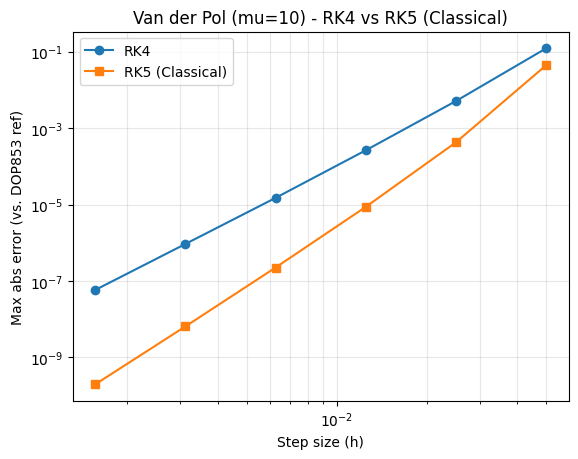

In [ ]:

# -----------------------------
# 4) Error vs. Reference
# -----------------------------
def max_abs_error_vs_reference(t_vals, y_vals, ref_sol):
    y_ref = ref_sol.sol(t_vals)
    diff = y_vals.T - y_ref
    return np.max(np.abs(diff))

def consecutive_rates(errors, hs):
    rates = []
    for i in range(len(errors) - 1):
        ratio_e = errors[i + 1] / errors[i]
        ratio_h = hs[i + 1] / hs[i]
        rates.append(np.log(ratio_e) / np.log(ratio_h))
    return rates

# Step sizes for analysis
step_sizes = [0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]

errors_rk4 = []
errors_rk5 = []

for h in step_sizes:
    # RK4
    t4, y4 = rk4_solver(vanderpol, t_span, y0, h)
    err4 = max_abs_error_vs_reference(t4, y4, ref_sol)
    errors_rk4.append(err4)

    # RK5 (Classical)
    t5, y5 = rk5_solver(vanderpol, t_span, y0, h)
    err5 = max_abs_error_vs_reference(t5, y5, ref_sol)
    errors_rk5.append(err5)

# Log-log analysis of errors
log_h = np.log(step_sizes)
log_err4 = np.log(errors_rk4)
log_err5 = np.log(errors_rk5)
slope4, _ = np.polyfit(log_h, log_err4, 1)
slope5, _ = np.polyfit(log_h, log_err5, 1)

# Local orders
rates4 = consecutive_rates(errors_rk4, step_sizes)
rates5 = consecutive_rates(errors_rk5, step_sizes)

# -----------------------------
# 5) Results Analysis
# -----------------------------
print("\nVan der Pol (mu=10), t in [0, 10]")
print("Final error = max(|y - y_ref|) over the entire grid.\n")

# Print table of results
print("-------------------------------------------------------------")
print("  h         RK4 Error       Local Ord.   |   RK5 Error      Local Ord.")
print("-------------------------------------------------------------")
for i, h in enumerate(step_sizes):
    e4 = errors_rk4[i]
    e5 = errors_rk5[i]
    o4 = f"{rates4[i-1]:.3f}" if i > 0 else "---"
    o5 = f"{rates5[i-1]:.3f}" if i > 0 else "---"
    print(f"{h:<9.5g}   {e4:<12.6g}   {o4:<8}   |   {e5:<12.6g}   {o5}")
print("-------------------------------------------------------------")
print(f"Overall log-log slope for RK4 ~ {slope4:.3f}")
print(f"Overall log-log slope for RK5 ~ {slope5:.3f}\n")

# Plot the errors
plt.figure()
plt.loglog(step_sizes, errors_rk4, 'o-', label="RK4")
plt.loglog(step_sizes, errors_rk5, 's-', label="RK5 (Classical)")
plt.xlabel("Step size (h)")
plt.ylabel("Max abs error (vs. DOP853 ref)")
plt.title("Van der Pol (mu=10) - RK4 vs RK5 (Classical)")
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.show()



## 2. Lotka–Volterra Model:**

$$
\begin{cases}
\dot{x}(t) = a x(t) - b x(t) y(t) \\
\dot{y}(t) = c x(t) y(t) - d y(t)
\end{cases}
$$

with parameters \( a, b, c, d > 0 \). Commonly interpreted as a simple predator–prey ecological model.


Computing reference solution with DOP853 ...

Lotka–Volterra Predator–Prey System
Parameters: a=1.0, b=0.1, c=0.075, d=1.0
Interval: t in (0.0, 30.0), Initial: x(0)=10.0, y(0)=5.0

Final error = max(|Y - Y_ref|) over all times in the grid.

-------------------------------------------------------------
  h         RK4 Error       Local Ord.   |   RK5 Error      Local Ord.
-------------------------------------------------------------
0.5         0.0901312      ---        |   0.0083861      ---
0.25        0.00658828     3.774      |   0.000144904    5.855
0.125       0.000485441    3.763      |   2.56159e-06    5.822
0.0625      3.26084e-05    3.896      |   4.88321e-08    5.713
0.03125     2.11175e-06    3.949      |   1.06304e-09    5.522
-------------------------------------------------------------
Overall log-log slope for RK4 ~ 3.842
Overall log-log slope for RK5 ~ 5.736



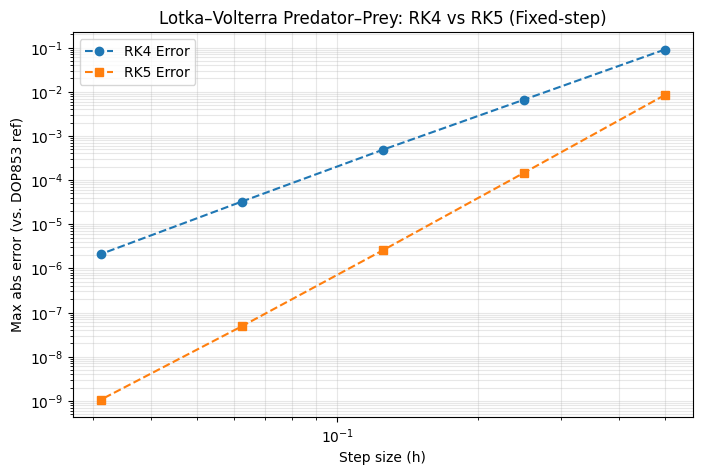

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

###############################################################################
# LOTKA–VOLTERRA PREDATOR–PREY SYSTEM
#
#   x'(t) = a*x - b*x*y
#   y'(t) = c*x*y - d*y
#
# We'll pick a=1.0, b=0.1, c=0.075, d=1.0,
# with initial conditions x(0)=10, y(0)=5, on t in [0, 30].
###############################################################################

def lotka_volterra(t, Y, a, b, c, d):
    x, y = Y
    dxdt = a*x - b*x*y
    dydt = c*x*y - d*y
    return np.array([dxdt, dydt], dtype=float)

def rk4_step(f, t, y, h, *args):
    k1 = f(t, y, *args)
    k2 = f(t + 0.5*h, y + 0.5*h*k1, *args)
    k3 = f(t + 0.5*h, y + 0.5*h*k2, *args)
    k4 = f(t + h,     y + h*k3,     *args)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def rk5_step(f, t, y, h, *args):
    """
    Classical Runge-Kutta 5th-order method.
    """
    # Classical RK5 coefficients
    c2, c3, c4, c5, c6 = 1/4, 3/8, 12/13, 1, 1/2
    a21 = 1/4
    a31, a32 = 3/32, 9/32
    a41, a42, a43 = 1932/2197, -7200/2197, 7296/2197
    a51, a52, a53, a54 = 439/216, -8, 3680/513, -845/4104
    a61, a62, a63, a64, a65 = -8/27, 2, -3544/2565, 1859/4104, -11/40

    b1, b2, b3 = 16/135, 0, 6656/12825
    b4, b5, b6 = 28561/56430, -9/50, 2/55

    # Compute intermediate slopes
    k1 = f(t, y, *args)
    k2 = f(t + c2*h, y + a21*h*k1, *args)
    k3 = f(t + c3*h, y + h*(a31*k1 + a32*k2), *args)
    k4 = f(t + c4*h, y + h*(a41*k1 + a42*k2 + a43*k3), *args)
    k5 = f(t + c5*h, y + h*(a51*k1 + a52*k2 + a53*k3 + a54*k4), *args)
    k6 = f(t + c6*h, y + h*(a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5), *args)

    # Combine slopes
    return y + h*(b1*k1 + b2*k2 + b3*k3 + b4*k4 + b5*k5 + b6*k6)

def solve_fixed_step_rk4(f, t_span, y0, h, *args):
    t0, t_end = t_span
    n_steps = int(np.ceil((t_end - t0)/h))
    t_vals = np.linspace(t0, t_end, n_steps+1)
    y_vals = np.zeros((n_steps+1, len(y0)))
    y_vals[0] = y0
    for i in range(n_steps):
        t_i = t_vals[i]
        y_i = y_vals[i]
        y_vals[i+1] = rk4_step(f, t_i, y_i, h, *args)
    return t_vals, y_vals

def solve_fixed_step_rk5(f, t_span, y0, h, *args):
    t0, t_end = t_span
    n_steps = int(np.ceil((t_end - t0) / h))
    t_vals = np.linspace(t0, t_end, n_steps + 1)
    y_vals = np.zeros((n_steps + 1, len(y0)))
    y_vals[0] = y0

    for i in range(n_steps):
        t_i = t_vals[i]
        y_i = y_vals[i]
        y_vals[i + 1] = rk5_step(f, t_i, y_i, h, *args)
    return t_vals, y_vals

def max_abs_error(t_vals, y_vals, ref_sol):
    """
    Compute the maximum absolute error between the computed solution and the reference solution.
    """
    y_ref = ref_sol.sol(t_vals)  # Evaluate the reference solution at t_vals
    diff = y_vals.T - y_ref      # Compute the difference
    return np.max(np.abs(diff))  # Return the maximum absolute error

def main():
    # 1) Problem setup: Lotka–Volterra
    a, b, c, d = 1.0, 0.1, 0.075, 1.0
    t_span = (0.0, 30.0)
    y0 = [10.0, 5.0]

    # 2) Reference solution using DOP853
    print("Computing reference solution with DOP853 ...")
    ref_sol = solve_ivp(
        fun=lambda t, Y: lotka_volterra(t, Y, a, b, c, d),
        t_span=t_span,
        y0=y0,
        method='DOP853',
        rtol=1e-12,
        atol=1e-12,
        dense_output=True
    )

    # 3) Fixed step sizes to test
    step_sizes = [0.5, 0.25, 0.125, 0.0625, 0.03125]

    errors_rk4 = []
    errors_rk5 = []

    for h in step_sizes:
        # RK4
        t4, y4 = solve_fixed_step_rk4(lambda t, Y: lotka_volterra(t, Y, a, b, c, d),
                                      t_span, y0, h)
        err4 = max_abs_error(t4, y4, ref_sol)
        errors_rk4.append(err4)

        # RK5 (Classical)
        t5, y5 = solve_fixed_step_rk5(lambda t, Y: lotka_volterra(t, Y, a, b, c, d),
                                      t_span, y0, h)
        err5 = max_abs_error(t5, y5, ref_sol)
        errors_rk5.append(err5)

    # 4) Approximate overall order via log-log slope
    log_h = np.log(step_sizes)
    log_err4 = np.log(errors_rk4)
    log_err5 = np.log(errors_rk5)
    slope4, _ = np.polyfit(log_h, log_err4, 1)
    slope5, _ = np.polyfit(log_h, log_err5, 1)

    # 5) Print results in a table
    def local_orders(errors, hs):
        """
        Compute local convergence orders from error and step sizes.
        """
        rates = []
        for i in range(len(errors) - 1):
            ratio_e = errors[i+1] / errors[i]
            ratio_h = hs[i+1] / hs[i]
            rates.append(np.log(ratio_e) / np.log(ratio_h))
        return rates

    local_rk4 = local_orders(errors_rk4, step_sizes)
    local_rk5 = local_orders(errors_rk5, step_sizes)

    print("\nLotka–Volterra Predator–Prey System")
    print(f"Parameters: a={a}, b={b}, c={c}, d={d}")
    print(f"Interval: t in {t_span}, Initial: x(0)={y0[0]}, y(0)={y0[1]}\n")
    print("Final error = max(|Y - Y_ref|) over all times in the grid.\n")

    print("-------------------------------------------------------------")
    print("  h         RK4 Error       Local Ord.   |   RK5 Error      Local Ord.")
    print("-------------------------------------------------------------")

    for i, h in enumerate(step_sizes):
        e4 = errors_rk4[i]
        e5 = errors_rk5[i]
        o4 = f"{local_rk4[i-1]:.3f}" if i > 0 else "---"
        o5 = f"{local_rk5[i-1]:.3f}" if i > 0 else "---"
        print(f"{h:<9.5g}   {e4:<12.6g}   {o4:<8}   |   {e5:<12.6g}   {o5}")

    print("-------------------------------------------------------------")
    print(f"Overall log-log slope for RK4 ~ {slope4:.3f}")
    print(f"Overall log-log slope for RK5 ~ {slope5:.3f}\n")

    # 6) Plot errors vs. step size (log-log)
    plt.figure(figsize=(8, 5))
    plt.loglog(step_sizes, errors_rk4, 'o--', label='RK4 Error')
    plt.loglog(step_sizes, errors_rk5, 's--', label='RK5 Error')
    plt.xlabel("Step size (h)")
    plt.ylabel("Max abs error (vs. DOP853 ref)")
    plt.title("Lotka–Volterra Predator–Prey: RK4 vs RK5 (Fixed-step)")
    plt.grid(True, which='both', alpha=0.3)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


## 3. Brusselator Model

A common 2D form is:

$$
\begin{cases}
\frac{dx}{dt} = A - (B+1)x + x^2 y, \\
\frac{dy}{dt} = Bx - x^2 y,
\end{cases}
$$

where \( A \) and \( B \) are constants (usually positive).

- When \( A = 1 \) and \( B = 3 \), for instance, the system can exhibit a stable limit cycle (an oscillation in \((x,y)\)-space).

- The name **“Brusselator”** comes from “Brussels,” where **Prigogine** and colleagues studied these autocatalytic chemical reactions.


Computing reference solution with DOP853 ...


<ipython-input-1-36da86ab6c0c>:23: RuntimeWarning: overflow encountered in scalar power
  dx = A - (B + 1) * x + x**2 * y
<ipython-input-1-36da86ab6c0c>:24: RuntimeWarning: overflow encountered in scalar power
  dy = B * x - x**2 * y
<ipython-input-1-36da86ab6c0c>:33: RuntimeWarning: invalid value encountered in add
  return y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
<ipython-input-1-36da86ab6c0c>:23: RuntimeWarning: overflow encountered in scalar multiply
  dx = A - (B + 1) * x + x**2 * y
<ipython-input-1-36da86ab6c0c>:24: RuntimeWarning: overflow encountered in scalar multiply
  dy = B * x - x**2 * y
<ipython-input-1-36da86ab6c0c>:56: RuntimeWarning: invalid value encountered in add
  k6 = f(t + c6 * h, y + h * (a61 * k1 + a62 * k2 + a63 * k3 + a64 * k4 + a65 * k5), *args)
<ipython-input-1-36da86ab6c0c>:59: RuntimeWarning: invalid value encountered in add
  return y + h * (b1 * k1 + b2 * k2 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6)



Brusselator System Results
--------------------------------------------------------------
   h        RK4 Error     Loc.Ord   |   RK5 Error     Loc.Ord
--------------------------------------------------------------
0.1       nan           ---      |  nan           ---
0.05      0.760147      nan      |  nan           nan
0.025     0.020844      5.189    |  0.0051218     nan
0.0125    0.000750752   4.795    |  5.59395e-05   6.517
0.00625   3.64026e-05   4.366    |  1.31108e-06   5.415
--------------------------------------------------------------
RK4 Overall Order: ~nan
RK5 Overall Order: ~nan


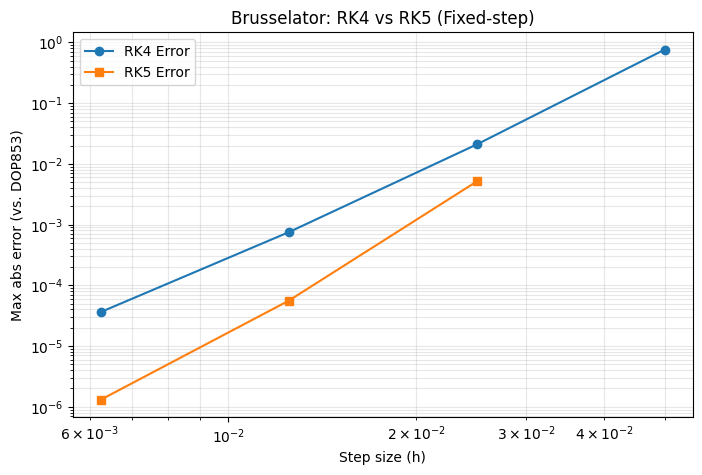

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

###############################################################################
# BRUSSELATOR (A=1, B=3)
#
#   dx/dt = A - (B+1)*x + x^2*y
#   dy/dt = B*x - x^2*y
#
# We'll solve from t=0..10, with initial conditions x(0)=1, y(0)=1,
# and compare RK4 vs. RK5 to a reference solution from DOP853.
###############################################################################

def brusselator(t, Y, A, B):
    """
    Right-hand side of the Brusselator system.

    Y = [x, y]
    A, B are parameters (A=1, B=3).
    """
    x, y = Y
    dx = A - (B + 1) * x + x**2 * y
    dy = B * x - x**2 * y
    return np.array([dx, dy], dtype=float)

def rk4_step(f, t, y, h, *args):
    """One step of classical 4th-order Runge-Kutta."""
    k1 = f(t, y, *args)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1, *args)
    k3 = f(t + 0.5 * h, y + 0.5 * h * k2, *args)
    k4 = f(t + h, y + h * k3, *args)
    return y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

def rk5_step(f, t, y, h, *args):
    """
    Classical Runge-Kutta 5th-order method.
    """
    # Classical RK5 coefficients
    c2, c3, c4, c5, c6 = 1/4, 3/8, 12/13, 1, 1/2
    a21 = 1/4
    a31, a32 = 3/32, 9/32
    a41, a42, a43 = 1932/2197, -7200/2197, 7296/2197
    a51, a52, a53, a54 = 439/216, -8, 3680/513, -845/4104
    a61, a62, a63, a64, a65 = -8/27, 2, -3544/2565, 1859/4104, -11/40

    b1, b2, b3 = 16/135, 0, 6656/12825
    b4, b5, b6 = 28561/56430, -9/50, 2/55

    # Compute intermediate slopes
    k1 = f(t, y, *args)
    k2 = f(t + c2 * h, y + a21 * h * k1, *args)
    k3 = f(t + c3 * h, y + h * (a31 * k1 + a32 * k2), *args)
    k4 = f(t + c4 * h, y + h * (a41 * k1 + a42 * k2 + a43 * k3), *args)
    k5 = f(t + c5 * h, y + h * (a51 * k1 + a52 * k2 + a53 * k3 + a54 * k4), *args)
    k6 = f(t + c6 * h, y + h * (a61 * k1 + a62 * k2 + a63 * k3 + a64 * k4 + a65 * k5), *args)

    # Combine slopes
    return y + h * (b1 * k1 + b2 * k2 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6)

def solve_fixed_step(method, f, t_span, y0, h, *args):
    """
    Integrate y' = f(t,y) from t_span[0] to t_span[1] with step size h.
    'method' = 'RK4' or 'RK5'
    """
    t0, t_end = t_span
    n_steps = int(np.ceil((t_end - t0) / h))
    t_vals = np.linspace(t0, t_end, n_steps + 1)
    y_vals = np.zeros((n_steps + 1, len(y0)))
    y_vals[0] = y0

    for i in range(n_steps):
        t_i = t_vals[i]
        y_i = y_vals[i]
        if method == 'RK4':
            y_vals[i + 1] = rk4_step(f, t_i, y_i, h, *args)
        elif method == 'RK5':
            y_vals[i + 1] = rk5_step(f, t_i, y_i, h, *args)
        else:
            raise ValueError("method must be 'RK4' or 'RK5'")

    return t_vals, y_vals

def max_abs_error(t_vals, y_vals, ref_sol):
    """
    Compare y_vals to reference at the same t_vals, returning max |y - y_ref|.
    """
    y_ref = ref_sol.sol(t_vals)  # shape: (2, len(t_vals))
    diff = y_vals.T - y_ref
    return np.max(np.abs(diff))

def local_orders(errors, hs):
    """
    Compute "local" or "consecutive" orders:
      order_i = log(err_{i+1}/err_i) / log(h_{i+1}/h_i)
    for i in 0..(n-2).
    """
    orders = []
    for i in range(len(errors) - 1):
        ratio_e = errors[i + 1] / errors[i]
        ratio_h = hs[i + 1] / hs[i]
        orders.append(np.log(ratio_e) / np.log(ratio_h))
    return orders

def main():
    # 1) Brusselator parameters
    A, B = 1.0, 3.0
    t_span = (0.0, 10.0)
    y0 = [1.0, 1.0]

    # 2) Reference solution: DOP853
    print("Computing reference solution with DOP853 ...")
    ref_sol = solve_ivp(
        fun=lambda t, Y: brusselator(t, Y, A, B),
        t_span=t_span,
        y0=y0,
        method='DOP853',
        rtol=1e-12,
        atol=1e-12,
        dense_output=True
    )

    # 3) Fixed step sizes to test
    step_sizes = [0.1, 0.05, 0.025, 0.0125, 0.00625]
    errors_rk4 = []
    errors_rk5 = []

    for h in step_sizes:
        t4, y4 = solve_fixed_step('RK4', lambda t, Y: brusselator(t, Y, A, B), t_span, y0, h)
        t5, y5 = solve_fixed_step('RK5', lambda t, Y: brusselator(t, Y, A, B), t_span, y0, h)
        errors_rk4.append(max_abs_error(t4, y4, ref_sol))
        errors_rk5.append(max_abs_error(t5, y5, ref_sol))

    # 4) Compute log-log slopes
    log_h = np.log(step_sizes)
    slope4, _ = np.polyfit(log_h, np.log(errors_rk4), 1)
    slope5, _ = np.polyfit(log_h, np.log(errors_rk5), 1)

    # 5) Print results
    print("\nBrusselator System Results")
    print("--------------------------------------------------------------")
    print("   h        RK4 Error     Loc.Ord   |   RK5 Error     Loc.Ord")
    print("--------------------------------------------------------------")
    local_rk4 = local_orders(errors_rk4, step_sizes)
    local_rk5 = local_orders(errors_rk5, step_sizes)
    for i, h in enumerate(step_sizes):
        o4 = f"{local_rk4[i-1]:.3f}" if i > 0 else "---"
        o5 = f"{local_rk5[i-1]:.3f}" if i > 0 else "---"
        print(f"{h:<8}  {errors_rk4[i]:<12.6g}  {o4:<7}  |  {errors_rk5[i]:<12.6g}  {o5}")
    print("--------------------------------------------------------------")
    print(f"RK4 Overall Order: ~{slope4:.3f}")
    print(f"RK5 Overall Order: ~{slope5:.3f}")

    # 6) Plot results
    plt.figure(figsize=(8, 5))
    plt.loglog(step_sizes, errors_rk4, 'o-', label="RK4 Error")
    plt.loglog(step_sizes, errors_rk5, 's-', label="RK5 Error")
    plt.xlabel("Step size (h)")
    plt.ylabel("Max abs error (vs. DOP853)")
    plt.title("Brusselator: RK4 vs RK5 (Fixed-step)")
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()



# 4.Further Learning: Adaptive RK5

The code below implements the adaptive RK5 (Dormand–Prince) method. As the step size is adaptively adjusted based on the error between the RK5 and an embedded RK4 solution, the plot of step size will appear as a straight line, indicating that step size no longer affects the RK5 solution significantly. Thus, we simply provide the code here for reference.

In [ ]:
def rk5_step_adaptive(f, t, y, h, tol):
    """
    Perform one step of the 5th-order Dormand–Prince method with adaptive step size control.

    Args:
        f: Function defining the ODE, dy/dt = f(t, y).
        t: Current time.
        y: Current value of the dependent variable (array-like for systems of ODEs).
        h: Current step size.
        tol: Tolerance for adaptive step size.

    Returns:
        y_5th: Solution at the next time step using 5th-order approximation.
        h_next: Suggested step size for the next iteration.
        success: Boolean indicating if the step is successful.
    """
    # Dormand-Prince coefficients for the intermediate steps and weights
    a21 = 1/5
    a31, a32 = 3/40, 9/40
    a41, a42, a43 = 44/45, -56/15, 32/9
    a51, a52, a53, a54 = 19372/6561, -25360/2187, 64448/6561, -212/729
    a61, a62, a63, a64, a65 = 9017/3168, -355/33, 46732/5247, 49/176, -5103/18656

    # Coefficients for 5th-order solution (higher accuracy)
    b1, b2, b3 = 35/384, 0, 500/1113
    b4, b5, b6 = 125/192, -2187/6784, 11/84

    # Coefficients for 4th-order solution (used for error estimation)
    b1_star, b2_star, b3_star = 5179/57600, 0, 7571/16695
    b4_star, b5_star, b6_star = 393/640, -92097/339200, 187/2100

    # Compute the intermediate slopes (k1 to k6)
    k1 = f(t, y)
    k2 = f(t + 0.2*h, y + a21*h*k1)
    k3 = f(t + 0.3*h, y + h*(a31*k1 + a32*k2))
    k4 = f(t + 0.8*h, y + h*(a41*k1 + a42*k2 + a43*k3))
    k5 = f(t + 8/9*h, y + h*(a51*k1 + a52*k2 + a53*k3 + a54*k4))
    k6 = f(t + h, y + h*(a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5))

    # Compute the 5th-order and 4th-order solutions
    y_5th = y + h*(b1*k1 + b2*k2 + b3*k3 + b4*k4 + b5*k5 + b6*k6)  # High-accuracy solution
    y_4th = y + h*(b1_star*k1 + b2_star*k2 + b3_star*k3 + b4_star*k4 + b5_star*k5 + b6_star*k6)  # Lower-order solution

    # Estimate the error as the difference between the two solutions
    error = np.linalg.norm(y_5th - y_4th, ord=np.inf)  # Use maximum norm for error estimation

    # Determine if the step is successful based on the error tolerance
    if error <= tol:
        success = True
        # Increase the step size for the next iteration, limited by a factor of 2
        h_next = h * min(2, max(0.1, 0.9 * (tol / error) ** (1/5)))
    else:
        success = False
        # Decrease the step size to improve accuracy
        h_next = h * max(0.1, 0.9 * (tol / error) ** (1/5))

    return y_5th, h_next, success

def rk5_solver_adaptive(f, t_span, y0, h0, tol):
    """
    Solve an ODE using the adaptive step size Dormand-Prince RK5 method.

    Args:
        f: Function defining the ODE, dy/dt = f(t, y).
        t_span: Tuple (t0, t_end) defining the time range for integration.
        y0: Initial value of y (array-like for systems of ODEs).
        h0: Initial step size.
        tol: Error tolerance for adaptive step size control.

    Returns:
        t_vals: Array of time values.
        y_vals: Array of y values at each time step.
    """
    t0, t_end = t_span  # Extract start and end times
    t_vals = [t0]  # List to store time values
    y_vals = [y0]  # List to store solution values
    h = h0  # Initialize step size

    while t_vals[-1] < t_end:
        t, y = t_vals[-1], y_vals[-1]  # Get current time and solution

        # Adjust step size if it goes beyond the end time
        if t + h > t_end:
            h = t_end - t

        # Perform one RK5 step with error control
        y_next, h_next, success = rk5_step_adaptive(f, t, y, h, tol)

        if success:
            # Accept the step: append new time and solution values
            t_vals.append(t + h)
            y_vals.append(y_next)
            h = h_next  # Update step size for the next iteration
        else:
            # Reject the step: retry with reduced step size
            h = h_next

    # Convert results to numpy arrays for easier manipulation
    return np.array(t_vals), np.array(y_vals)


Reference
* Hairer & Wanner” or “Butcher’s Numerical Methods for Ordinary Differential Equations
* van der Pol, B. (1926). On 'relaxation-oscillations'. The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 2(7), 978–992
* Lotka's Work: Lotka, A. J. (1925). Elements of Physical Biology. Williams and Wilkins.
* Volterra's Work: Volterra, V. (1926). "Variazioni e fluttuazioni del numero d'individui in specie animali   conviventi". Mem. Acad. Lincei Roma
* Symmetry Breaking Instabilities in Dissipative Systems. II." by I. Prigogine et al., published in The Journal of Chemical Physics in 1968.